In [33]:
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from vqls import *
import time

label = 'elu'
lower = -1
upper = 1.
n_step = 20

In [44]:
lab = 'sigmoid'
path = f"results_vqs_{lab}_1_20.json"           
df = pd.read_json(path)
print(df.shape)

for i in range(3):
    path1 = f'res{i}.json'
    df2 = pd.read_json(path1)
    print(df2.shape)
df = pd.concat([df,df2], axis = 0)
df.shape


(175, 6)
(25, 6)
(25, 6)
(25, 6)


(200, 6)

In [45]:
df5 = df.reset_index(drop=True)
df5.shape

(200, 6)

In [46]:

df5.to_json(path)

In [4]:
path1 = "results_vqs_sigmoid_1_20.json"           
df = pd.read_json(path)
print(df.seed.value_counts()[df.seed.value_counts()>1])
#path2 = "results_vqs_sigmoid_2_20.json"           
#df2 = pd.read_json(path2)
#print(df2.shape)
#print(df2.seed.duplicated().sum())
#df = pd.concat([df,df2], axis = 0)
#print(df.shape)
#print(df.seed.duplicated().sum())
#df5 = df.reset_index(drop=True)
#df5.to_json(path1)
#print([a for a, b in df[df.seed==8457].weights.items()])
df[df.seed==8457]

5130    2
4800    2
8457    2
2732    2
2655    2
       ..
682     2
2137    2
8261    2
838     2
7875    2
Name: seed, Length: 61, dtype: int64


,exe_time,rmse,RSS_q,weights,training_cost,seed
95,214.782394,0.473433,8.965544,"[[6.0844740751], [6.1874025416], [6.2558383840...","[[0.052170140500000003, 0.045942661700000005, ...",8457
731,160.103380,0.686991,18.878261,"[[6.1023610271], [6.1663875185], [6.2804584293...","[[0.048777542300000004, 0.0431619192, 0.036294...",8457


In [5]:
df.seed.value_counts()[df.seed.value_counts()>1].keys()

Int64Index([5130, 4800, 8457, 2732, 2655, 1290, 1908, 5113, 9518,  968, 8217,
            9923, 3288, 3791, 8388, 7650, 8271, 8595, 8740, 2713, 3232, 5312,
            6944, 1115, 2502, 4071,  615, 7533, 2689, 5262, 6851, 2392, 2931,
            1804, 7812, 6455, 3672, 7070, 4536, 7003, 2188, 2688, 2817, 6221,
            9743, 3571,  222, 4840, 1035, 1059, 4908, 1288,   36, 9826, 9496,
              77,  682, 2137, 8261,  838, 7875],
           dtype='int64')

In [6]:
sed = 838

In [7]:
for sed in df.seed.value_counts()[df.seed.value_counts()>1].keys():
    if np.count_nonzero([(a[0]-b[0]) for a,b in 
                zip(df[df.seed==sed].weights.values[0], df[df.seed==sed].weights.values[1])]) ==0:
                print(sed)


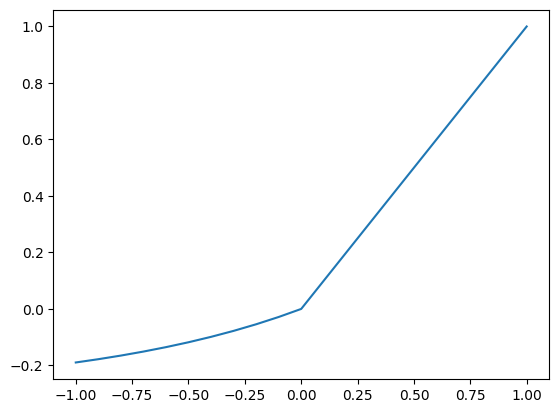

In [8]:
func_out =   {'sigmoid': sigmoid,'tanh': tanh,'elu': elu, 'relu': relu, 'sin':sin_o}
func=func_out[label]
func_dict =  {'sigmoid': .0,'tanh': 1.0,'elu':0, 'relu':.0, 'sin':1}
f_i = func_dict[label]
x = np.arange(lower, upper + .03, (upper-lower)/n_step).tolist() 
xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in x]
plt.plot(x,y)

In [73]:
import vqls

func_dict, func_out, lower, upper = get_func('vqs')
step = (upper-lower)/n_step
label = 'sigmoid'
f_i = func_dict[label]

f_e = f_i

func = func_out[label]


x = np.arange(lower, upper + .03, step).tolist()
y = [func(value,f_i) for value in x]

M = []
Y = []
q_weights=[]
c_coeff=[]
k_list=[]
tr_costs =[]

for i in range(1, len(x)):
    eq1 = pd.Series([1, x[i - 1]])
    eq2 = pd.Series([1, x[i]])
    M_c = pd.concat([eq1, eq2], axis=1).transpose()
    Y.append([y[i - 1], y[i]])
    M.append(M_c)

for i in range(len(M)):

        matrix = M[i]
        vector = Y[i]
        if vector == [0.0, 0.0]:
            #y = [el + 10 ** -4 for el in y]
            vector = [.000001, 0.00001] # the relu case
        v_norm = vector/np.linalg.norm(vector)
        k_numb=np.linalg.cond(np.array(matrix))
        k_list.append(k_numb)
        vqls_circuit = VQLS(matrix,v_norm,1) 
        weights = vqls_circuit.train(max_iter=300, warm_start=0.001) 
        tr_costs.append(vqls_circuit.cost_vals)
        q_weights.append(vqls_circuit.weight_history[-1])



In [74]:
q_weights

[array([6.08475]),
 array([-0.098375]),
 array([-0.01025]),
 array([0.07475]),
 array([0.1785]),
 array([0.307875]),
 array([0.38725]),
 array([0.511]),
 array([0.569125]),
 array([0.616]),
 array([0.616]),
 array([0.5435]),
 array([0.366]),
 array([0.08475]),
 array([-0.269]),
 array([-0.634]),
 array([-0.930875]),
 array([-1.149625]),
 array([-1.27025]),
 array([-1.364])]

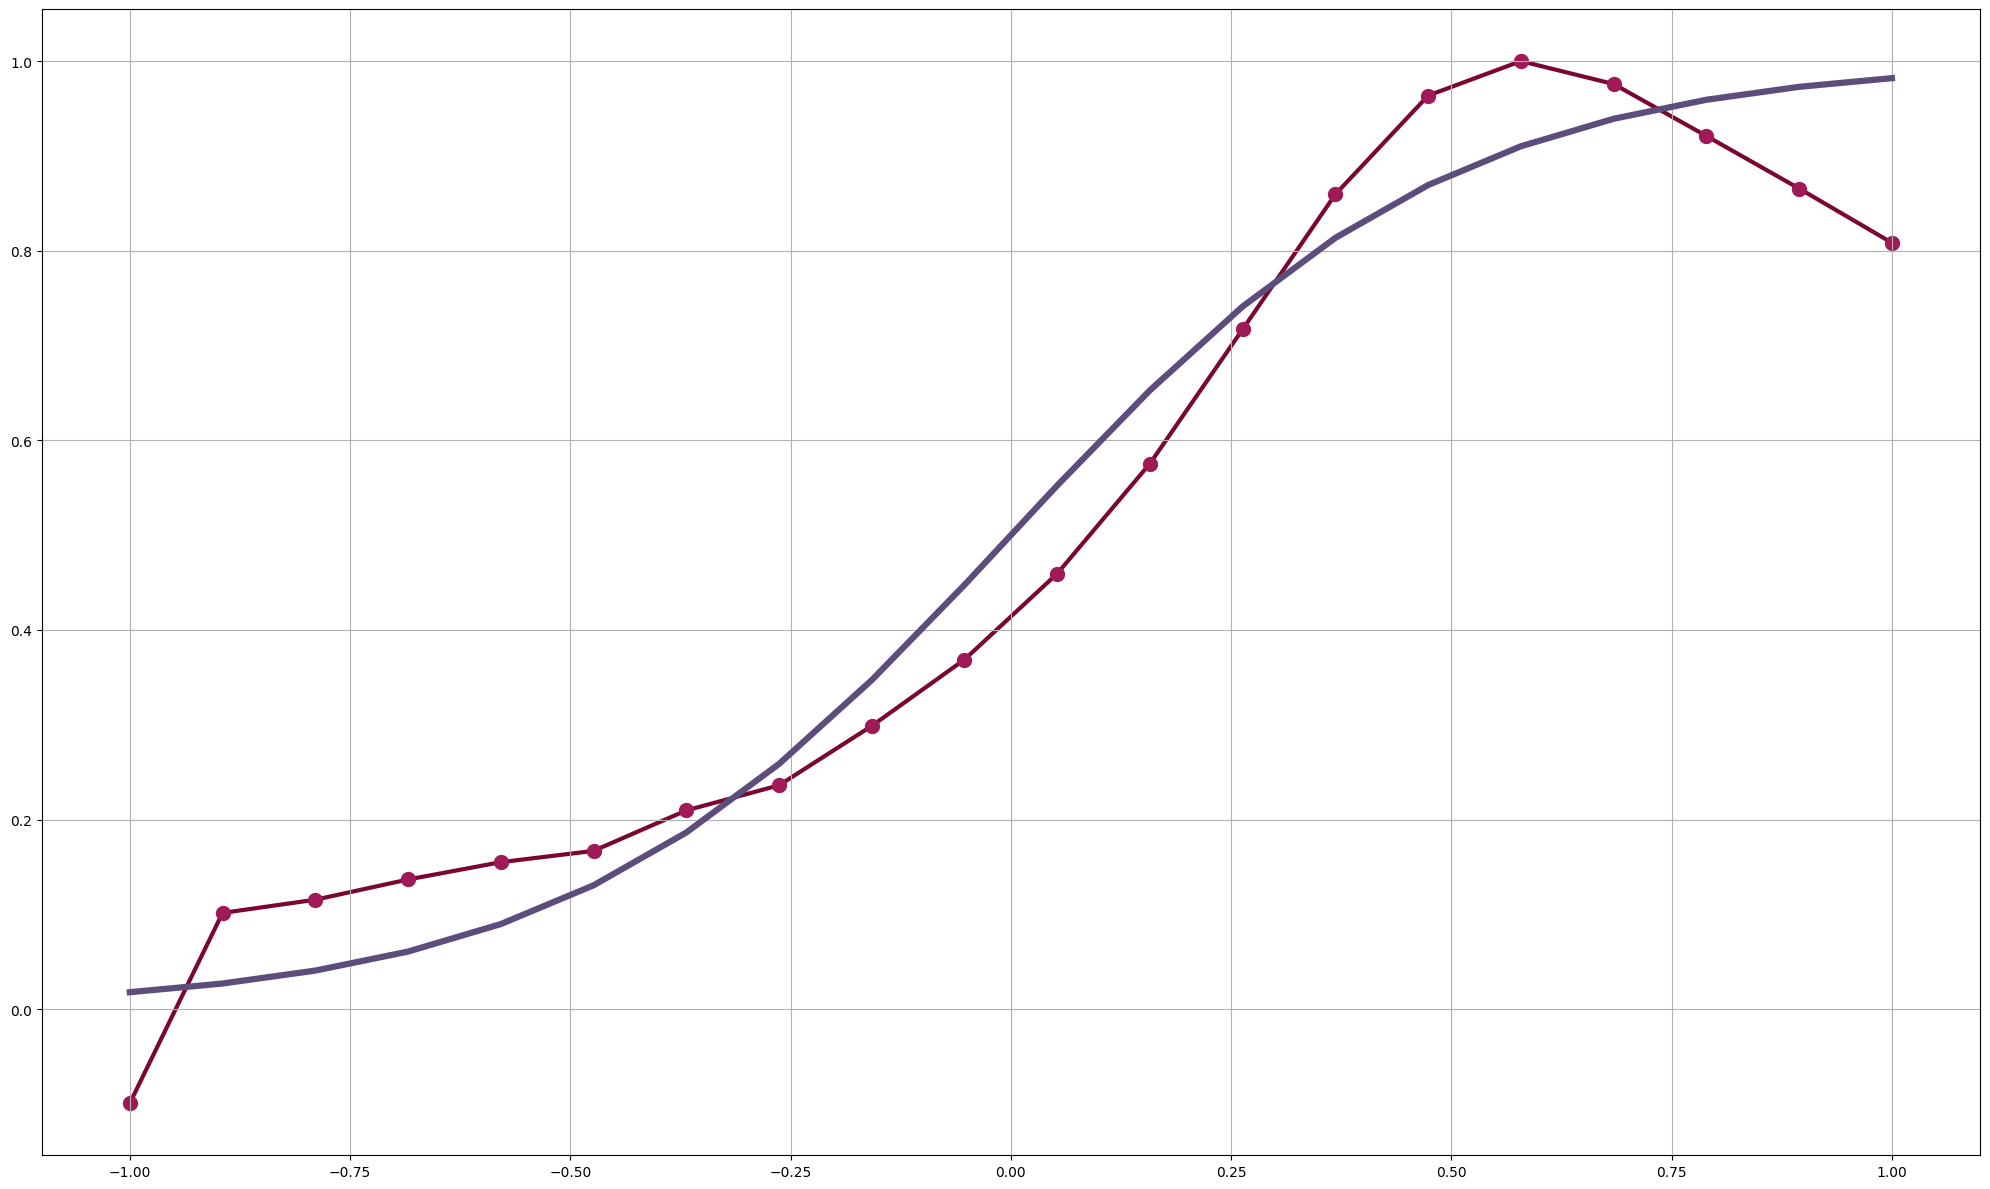

In [75]:
yfq = []
x = np.arange(lower, upper, step).tolist()
qprod = qProduct(1)
qc_full = []
for j in range(len(x)):
    point = [1,x[j]]
    qc_full.append(qprod.direct_prod2(q_weights[j],point).item())  
yfq.append(qc_full)
nq, n_step = 1, 20
flab = 'sigmoid'
func = func_out[flab]
f_i = func_dict[flab]
func_dict, func_out, lower, upper = get_func('vqs')

xx = np.linspace(lower, upper, n_step) ##inputs sampling in the interval 0,1
y = [func(value,f_i) for value in xx]
fig = plt.figure(tight_layout = False, figsize=(20,12))
plt.grid(zorder = -3)
plt.plot(xx,y,  label=f"Original function scaled {n_step}", color = '#5c4d7d',linewidth=4.5)

colorl = '#7a0632'
colors = '#a01a58'
plt.plot(xx,*yfq, color=colorl, zorder= -1, lw=3)
plt.scatter(xx,yfq, color=colors, linewidths=5)
#plt.scatter(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
#plt.plot(np.linspace(lower,upper,len(y_fq)),(y_q), label= f"hq {n_step}", color='blue')
#ax[i].text(0.35,0.87, f"rmse scaled = {rssss2:.4f}\n" \
#    f"rmse classical = {rssss:.4f}\n", fontsize=14)


In [16]:
q2 = q_weights

In [17]:
[a-b for a, b in zip(q1,q2)]#95

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.])]

In [13]:
[a-b for a, b in zip(q1,df[df.seed==8457].weights[95])]#95

[array([0.02346333]),
 array([-0.00134014]),
 array([0.02397402]),
 array([-0.01607894]),
 array([0.02736736]),
 array([0.02376736]),
 array([-0.027582]),
 array([0.00940158]),
 array([6.28361647]),
 array([-0.01129975]),
 array([0.01342797]),
 array([0.00196918]),
 array([-0.00388095]),
 array([-6.28076019]),
 array([0.00460911]),
 array([0.01622719]),
 array([-0.02493516]),
 array([-0.01300154]),
 array([0.00834955]),
 array([4.37196945e-11])]

In [12]:
q1

[array([6.10793741]),
 array([6.18606241]),
 array([6.27981241]),
 array([6.35918741]),
 array([6.48293741]),
 array([6.58668741]),
 array([6.66606241]),
 array([6.79543741]),
 array([6.85356241]),
 array([6.90043741]),
 array([0.63918741]),
 array([0.54106241]),
 array([0.38918741]),
 array([0.08793741]),
 array([-0.25143759]),
 array([-0.61081259]),
 array([-0.92768759]),
 array([-1.14081259]),
 array([-1.26706259]),
 array([-1.39643759])]